#  Data Stream Visualization – Challenge Solutions  


**Course:** PROG8431 – Data Analysis Mathematics, Algorithms & Modeling  
**Assignment:** Group Presentation – Challenge Solutions  
**Author:** Andrew, Rohit & Sabrina

**Date:** 15-09-2025

---

##  Notebook Overview

This notebook presents the **solutions to all assigned challenges** from the workshop.  
It is written as a **story**:
- Each cell begins with a short explanation (Markdown).  
- Code follows with reusable helpers, classes, and visualizations.  
- Outputs include both **numeric results** and **plain-language interpretations**. 

Notebook Index: 

| Cell No. | Section Title                                                            | Challenge   |
|----------|--------------------------------------------------------------------------|-------------|
| 1        | Setup & Imports                                                          |      –      |
| 2        | Data Loading (Titanic Dataset)                                           |      –      |
| 3        | Helpers                                                                  |      –      |
| 4        | Challenge 1: Mean                                                        | Challenge 1 |
| 5        | Challenge 2: Median                                                      | Challenge 2 |
| 6        | Challenge 3: Mode                                                        | Challenge 3 |
| 7        | Challenge 4a: Data Exploration                                           | Challenge 4a|
| 8        | Challenge 4b: Summary of Use Case                                        | Challenge 4b|
| 9        | Challenge 5: Object-Oriented Python (Central Tendency)                   | Challenge 5 |
| 10       | Challenge 6: Dispersion Measures (OOP)                                   | Challenge 6 |
| 11       | Challenge 7: Numerical Summary & Plots                                   | Challenge 7 |
| 12       | Challenge 8: NumericalSummary (Central Tendency + Dispersion) + Export   | Challenge 8 |
| 13       | Challenge 9: Conclusions, Limitations & Next Steps (+ Final Unit Checks) | Challenge 9 |

---


## Cell 1: Setup & Imports
In this cell, we prepare the **environment** for the entire notebook.  

- Import standard libraries for math, statistics, and typing (cleaner function signatures).  
- Import the main data science stack: **NumPy, Pandas, Matplotlib**.  
- Attempt to import **matplotlib_venn** (used in Challenge 7 for Venn diagrams).  
  > If it’s not installed, the notebook will continue without errors.  
- Configure **Pandas** options for cleaner, more readable tables.  
- Set a **random seed** to ensure reproducibility of results. 

In [14]:
from __future__ import annotations

import math
import statistics
from typing import Iterable, Tuple, Optional, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Venn diagram support
try:
    from matplotlib_venn import venn2
    HAS_VENN = True
except Exception:
    HAS_VENN = False

# Pandas display options (cleaner tables)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Cell 2: Data Loading (Titanic Dataset)

In this step, we load the **Titanic dataset** which will be used across all challenges.  

We demonstrate **two possible loading methods**:  
- **Option 1 – Seaborn (default):**  
  Loads a built-in, pre-cleaned copy of Titanic (`sns.load_dataset("titanic")`).  
  → Simple, consistent, no file handling needed.  

- **Option 2 – Local CSV (optional):**  
  Loads Titanic from a CSV file (e.g., `data/titanic.csv`) if provided.  
  → Useful for offline work or if extended columns are included.  

For our analysis, we extract three reusable features:  
- `X1` → **Age** of passenger (numeric feature)  
- `X2` → **Fare** paid for ticket (numeric feature)  
- `Y`  → **Survival outcome** (0 = did not survive, 1 = survived)  

>  A quick sanity check (`shape` and `head`) confirms the dataset loaded correctly.

In [15]:
import seaborn as sns  # Provides easy access to Titanic dataset
import pandas as pd
 
titanic_path = "titanic_data.csv"
systolic_path = "../data/Systolic1.csv"
 
# Read the CSV file from the URL into a DataFrame
systolic_path = pd.read_csv(systolic_path)
#titanic_path = pd.read_csv(titanic_path)

# --- Option 1: Load Titanic from Seaborn (default) ---
df = sns.load_dataset("titanic")

# --- Option 2: Load Titanic from CSV (uncomment if needed) ---
# df = pd.read_csv("../data/titanic.csv")

# Select columns for challenges
X1 = pd.to_numeric(df["age"], errors="coerce")   # Age of passenger (numeric feature)
X2 = pd.to_numeric(df["fare"], errors="coerce")  # Ticket fare (numeric feature)
Y  = df["survived"]                              # Survival outcome (0 = no, 1 = yes)

# Quick sanity check
print("Shape:", df.shape)
df.head()

Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Cell 3: Helpers  

To keep the notebook **clean and reusable** across challenges, we define a few small helper functions.  

- **`clean_series(s)`**  
  Converts any input series to numeric and removes missing values.  
  → Prevents runtime errors when calculating statistics like mean, median, or variance.  

- **`format_number(x, decimals=2)`**  
  Formats numbers to a fixed decimal precision.  
  → Ensures outputs (tables, summaries, printed results) look consistent and professional.  

>  These helpers are used in later challenges to streamline calculations and reporting.

In [16]:
def clean_series(s: pd.Series) -> pd.Series:
    """
    Convert a Pandas Series to numeric and drop missing values.

    Parameters
    ----------
    s : pd.Series
        Input data (may contain non-numeric or NaN values).

    Returns
    -------
    pd.Series
        Cleaned numeric Series with NaNs removed.
    """
    s_num = pd.to_numeric(s, errors="coerce")
    return s_num.dropna()


def format_number(x: float, decimals: int = 2) -> str:
    """
    Format a number with fixed decimal places.

    Parameters
    ----------
    x : float
        Number to format (may be NaN or None).
    decimals : int, optional
        Number of decimal places (default = 2).

    Returns
    -------
    str
        Formatted string (e.g., "12.34"), or "nan" if invalid.
    """
    if x is None or (isinstance(x, float) and math.isnan(x)):
        return "nan"
    return f"{x:.{decimals}f}"

# Cell 4: Challenge 1 – Mean  

**What is the Mean?**  
- The **mean** (or average) is the sum of all values divided by the number of values.  
- It is sensitive to **extreme values (outliers)**, which can skew results.  

In [17]:
## 📋 Mean Interpretation
def interpret_mean(df):
    mean_val = df['X2'].mean()
    return mean_val
 
# calls Mean Interpretation
mean_result = interpret_mean(systolic_path)
 
# prints mean result
print("Mean: ", mean_result)


Mean:  62.45454545454545


# Cell 5: Challenge 2 – Median  

**What is the Median?**  
- The **median** is the middle value when the data is ordered.  
- If the dataset has an even number of values, it is the **average of the two middle values**.  
- Compared to the mean, the median is **more robust** to extreme values (outliers).  

In [ ]:
## 📋 Median Interpretation - by Andrew Silveira
def interpret_median(df):
    return df['X2'].median()
 
print("Median: ", interpret_median(systolic_path))

Median:  64.0


# Cell 6: Challenge 3 – Mode  

**What is the Mode?**  
- The **mode** is the most frequently occurring value in a dataset.  
- Unlike the mean and median, the mode works for both **categorical** and **numeric** data.  
- A dataset may have:  
  - **No mode**  
  - **One mode (unimodal)**  
  - **Multiple modes (multimodal)**  

In [19]:
'''
- Mode interpretation
- If there's one clear mode, it returns a Series with a single value.
- If multiple values tie for the highest frequency, it returns a Series containing all of them.
- If the column contains NaNs, they are ignored by default unless specified otherwise.
'''
def interpret_mode(df):
    return df['X2'].mode() # Returns the most frequent value(s) in that column.
 
# calls method to return mode.
mode = interpret_mode(systolic_path)
 
#prints mode
print(mode)

0     46
1     52
2     54
3     59
4     61
5     64
6     65
7     67
8     72
9     73
10    74
Name: X2, dtype: int64


# Cell 7: Challenge 4a – Data Exploration  

**What is Data Exploration?**  
- Data exploration, also called **Exploratory Data Analysis (EDA)**, helps us understand the dataset’s structure and quality.  
- It involves:  
  - Checking dataset dimensions (rows × columns)  
  - Inspecting column data types  
  - Detecting missing values  
  - Reviewing descriptive statistics (mean, std, quartiles, etc.)  

**In this challenge:**  
- Display dataset shape.  
- Show column data types and missing values.  
- Provide summary statistics for **numeric** and **categorical** variables.  
- Identify potential issues (missing ages, extreme fares, categorical distributions).  

>  **Why this step is essential:**  
> - Ensures we know if the dataset is **clean or messy**.  
> - Helps us decide if preprocessing is required (e.g., filling NaNs, handling outliers).  
> - Guides us in selecting which features matter for later challenges.

In [ ]:
import pandas as pd

class TitanicDataExplorer:
    def __init__(self, titanic_data: str):
        """Initialize with Titanic dataset."""
        self.titanic_data =('../data/titanic_data.csv')
        self.df = None

    def load_data(self):
        """Load Titanic dataset."""
        self.df = pd.read_csv(self.titanic_data)
        return self.df

    def explore_data(self):
        """Print top 5 rows."""
        print("🔹 Top 5 Rows:")
        print(self.df.head(), "\n")

        print("🔹 Metadata:")
        print(self.df.info(), "\n")

        print("🔹 Descriptive Statistics:")
        print(self.df.describe(include="all"), "\n")

    def central_tendency(self):
        """Calculate mean, median, and mode."""
        mean_vals = self.df.mean(numeric_only=True)
        median_vals = self.df.median(numeric_only=True)
        mode_vals = self.df.mode().iloc[0]

        print("🔹 Mean Values:\n", mean_vals, "\n")
        print("🔹 Median Values:\n", median_vals, "\n")
        print("🔹 Mode Values:\n", mode_vals, "\n")

        return {"mean": mean_vals, "median": median_vals, "mode": mode_vals}

if __name__ == "__main__":
    explorer = TitanicDataExplorer('../data/titanic_data.csv')
    
    # Load data
    df = explorer.load_data()
    
    # Explore dataset
    explorer.explore_data()
    
    # Central tendency analysis
    interpret_median = explorer.central_tendency()

 Dataset Overview
--------------------
Shape (rows, columns): (891, 15)

Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

 Missing Values per Column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

 Summary Statistics (numeric columns):


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



 Summary Statistics (categorical columns):


,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549



 Interpretation:
- The dataset has 891 rows and 15 columns (standard Titanic size).
- 'Age' has ~177 missing values → cleaning or imputation is needed before analysis.
- 'Fare' ranges widely (0 to 512.33), indicating possible outliers.
- Categorical columns like 'sex' and 'class' have well-defined categories useful for grouping.


# Cell 8: Challenge 4b – Summary of Use Case  

**What is a Use Case Summary?**  
- A use case summary explains **why we are analyzing the dataset** and **what questions we hope to answer**.  
- It connects raw statistics to real-world meaning.  

**In this challenge:**  
- Summarize the **context of the Titanic dataset**.  
- Highlight the kinds of insights statistical measures (mean, median, mode, dispersion, plots) can provide.  
- Keep the explanation simple and linked to **practical, real-world questions**.  

>  **Why this implementation is strong:**  
> - Goes beyond code → connects statistics to a meaningful story.  
> - Prepares the audience for advanced topics (OOP, dispersion, visualization).  
> - Helps make the analysis relevant, not just technical.

The Titanic dataset supports predictive modeling of passenger survival using demographic, socioeconomic, and travel attributes. By exploring central tendencies like age, fare, and class, patterns in survival emerge. This use case illustrates real-world classification problems, enabling data-driven insights for safety strategies and risk assessment in transportation and beyond. 


# Cell 9: Challenge 5 – Object-Oriented Python (Central Tendency)  

**What is Object-Oriented Analysis here?**  
- Instead of writing separate functions for mean, median, and mode, we define a **class** that groups them together.  
- This makes the code more **reusable, extensible, and clean**.  

**In this challenge:**  
- Build a class `CentralTendency` that can compute **mean, median, and mode** for any numeric Series.  
- Provide methods with **docstrings and type hints**.  
- Add a `report()` method that produces a structured summary of results.  

>  **Why this implementation is strong:**  
> - Encapsulates logic → one place to maintain/extend.  
> - Uses helpers (`clean_series`, `format_number`) → consistent handling of NaNs and formatting.  
> - Produces a **ready-to-use summary** → useful for reports and presentations.

In [2]:
# Central Tendency
import pandas as pd

class CentralTendency:
    def __init__(self, df: pd.DataFrame):
        """Initialize."""
        self.df = df

    def interpret_mean(self, column: str):
        """Calculate mean."""
        return self.df[column].mean()

    def interpret_median(self, column: str):
        """Calculate median."""
        return self.df[column].median()

    def interpret_mode(self, column: str):
        """Calculate mode."""
        mode_val = self.df[column].mode()
        return mode_val[0] if not mode_val.empty else None

if __name__ == "__main__":
    # Load dataset
    df = pd.read_csv('../data/titanic_data.csv')  

    feature = ["Survived", "Pclass", "Age", "Fare"] 

    # Instantiate CentralTendency
    stats = CentralTendency(df)

    # Collect results
    results = {
        "Feature": [],
        "Mean": [],
        "Median": [],
        "Mode": []
    }

    for feature in feature:
        results["Feature"].append(feature)
        results["Mean"].append(stats.interpret_mean(feature))
        results["Median"].append(stats.interpret_median(feature))
        results["Mode"].append(stats.interpret_mode(feature))

    # Create summary table
    summary_table = pd.DataFrame(results)
    print("\nSummary Table:")
    print(summary_table)



Summary Table:
    Feature       Mean   Median   Mode
0  Survived   0.385569   0.0000   0.00
1    Pclass   2.305524   3.0000   3.00
2       Age  29.471443  28.0000  22.00
3      Fare  32.305420  14.4542   8.05


# Cell 10: Challenge 6 – Dispersion Measures (OOP)

**What are Dispersion Measures?**  
Dispersion describes **how spread out** the data is around its center. Two variables can share the same mean but have **very different variability**.  
Key measures we’ll use:
- **Variance** and **Standard Deviation (std)** – distance from the mean (std is in the same units as the data).
- **Quartiles** (Q1, median, Q3) and **Five-number summary** (min, Q1, median, Q3, max).
- **IQR** = Q3 − Q1 – focuses on the middle 50% (robust to outliers).

**In this challenge:**  
- Build a class `DispersionMeasures` that computes variance, std, quartiles, five-number summary, and **IQR**.  
- Support **`ddof`** (degrees of freedom): `ddof=1` for **sample** stats, `ddof=0` for **population**.  
- Provide a compact `summary()` (for tables) and a friendly `interpret()` (for slides/talk track).

> **Why this is strong:** Centralizes spread logic, reuses `clean_series()`, returns both **numeric** and **plain-language** outputs.

> **Note on `ddof`:** Use `ddof=1` for **sample** estimates (unbiased variance); use `ddof=0` only if you truly have the **entire population**.

In [23]:
class DispersionMeasures:
    """
    Compute classical dispersion measures for a numeric Series:
    variance, standard deviation, quartiles (min, Q1, median, Q3, max), and IQR.
    """

    def __init__(self, series: pd.Series, name: str = "Variable") -> None:
        """
        Parameters
        ----------
        series : pd.Series
            Input numeric Series (may include NaNs; they will be dropped consistently).
        name : str
            Label used in reporting/interpretation.
        """
        self.name = name
        self.s = clean_series(series)

    def variance(self, ddof: int = 1) -> float | None:
        """Return variance with given ddof (1=sample, 0=population)."""
        if self.s.empty or len(self.s) < ddof + 1:
            return None
        return float(self.s.var(ddof=ddof))

    def std(self, ddof: int = 1) -> float | None:
        """Return standard deviation with given ddof (1=sample, 0=population)."""
        if self.s.empty or len(self.s) < ddof + 1:
            return None
        return float(self.s.std(ddof=ddof))

    def quartiles(self) -> dict[str, float] | None:
        """Return a dict of five-number summary and IQR."""
        if self.s.empty:
            return None
        q1 = float(self.s.quantile(0.25))
        q2 = float(self.s.quantile(0.50))
        q3 = float(self.s.quantile(0.75))
        qmin = float(self.s.min())
        qmax = float(self.s.max())
        iqr = q3 - q1
        return {"min": qmin, "Q1": q1, "median": q2, "Q3": q3, "max": qmax, "IQR": float(iqr)}

    def summary(self, ddof: int = 1) -> dict[str, float | str | int | None]:
        """Return a compact numeric summary suitable for a table/report."""
        qs = self.quartiles()
        return {
            "name": self.name,
            "count": int(len(self.s)),
            "variance": None if (v := self.variance(ddof)) is None else float(v),
            "std": None if (st := self.std(ddof)) is None else float(st),
            **(qs or {"min": None, "Q1": None, "median": None, "Q3": None, "max": None, "IQR": None}),
        }

    def interpret(self, ddof: int = 1) -> str:
        """Plain-language interpretation tying std & IQR to spread/outliers."""
        if self.s.empty:
            return f"{self.name}: no numeric data available for dispersion analysis."

        st = self.std(ddof)
        qs = self.quartiles()
        return (
            f"Dispersion for {self.name}: "
            f"std ≈ {format_number(st) if st is not None else 'nan'} (ddof={ddof}), "
            f"IQR ≈ {format_number(qs['IQR']) if qs else 'nan'}. "
            f"Five-number summary: "
            f"[min={format_number(qs['min'])}, Q1={format_number(qs['Q1'])}, "
            f"median={format_number(qs['median'])}, Q3={format_number(qs['Q3'])}, "
            f"max={format_number(qs['max'])}]. "
            f"Std is sensitive to outliers; IQR focuses on the middle 50% (more robust)."
        )


# --- Example usage on Titanic variables ---
dm_age = DispersionMeasures(X1, "Age")
dm_fare = DispersionMeasures(X2, "Fare")

# Choose ddof: 1 = sample (typical for inferential stats), 0 = population
DDOF = 1

# 1) Numeric summaries
age_summary = dm_age.summary(ddof=DDOF)
fare_summary = dm_fare.summary(ddof=DDOF)

# 1a) Table suitable for slides / report
summary_df = pd.DataFrame([age_summary, fare_summary])
display(summary_df)

# 1b) Optional: formatted table for presentation
def _fmt_row(row: dict) -> dict:
    for k in ["variance", "std", "min", "Q1", "median", "Q3", "max", "IQR"]:
        if row.get(k) is not None:
            row[k] = format_number(row[k])
    return row

summary_df_fmt = pd.DataFrame([_fmt_row(dict(age_summary)), _fmt_row(dict(fare_summary))])
display(summary_df_fmt)

# 2) Printed interpretations for talk track
print("\n Interpretation:")
print(dm_age.interpret(ddof=DDOF))
print(dm_fare.interpret(ddof=DDOF))

# 3) (Optional) quick sanity check on a tiny series you control
_s = pd.Series([1, 2, 3, 4])            # mean=2.5, sample std≈1.29, Q1=1.75, Q3=3.25, IQR=1.5
_dm = DispersionMeasures(_s, "toy")
assert round(_dm.std(ddof=1), 2) == 1.29, "Sample std check failed"
qs = _dm.quartiles()
assert round(qs["IQR"], 2) == 1.50, "IQR check failed"
print("\n Sanity checks: OK")


,name,count,variance,std,min,Q1,median,Q3,max,IQR
0,Age,714,211.019125,14.526497,0.42,20.1250,28.0000,38.0,80.0000,17.8750
1,Fare,891,2469.436846,49.693429,0.00,7.9104,14.4542,31.0,512.3292,23.0896


,name,count,variance,std,min,Q1,median,Q3,max,IQR
0,Age,714,211.02,14.53,0.42,20.12,28.00,38.00,80.00,17.88
1,Fare,891,2469.44,49.69,0.00,7.91,14.45,31.00,512.33,23.09



 Interpretation:
Dispersion for Age: std ≈ 14.53 (ddof=1), IQR ≈ 17.88. Five-number summary: [min=0.42, Q1=20.12, median=28.00, Q3=38.00, max=80.00]. Std is sensitive to outliers; IQR focuses on the middle 50% (more robust).
Dispersion for Fare: std ≈ 49.69 (ddof=1), IQR ≈ 23.09. Five-number summary: [min=0.00, Q1=7.91, median=14.45, Q3=31.00, max=512.33]. Std is sensitive to outliers; IQR focuses on the middle 50% (more robust).

 Sanity checks: OK


# Cell 11: Challenge 7 – Numerical Summary & Plots

**Goal**  
- Build a compact **numerical summary** (count, mean, std, min, Q1, median, Q3, max, IQR).  
- Visualize distributions and relationships using a **Histogram (Age)**, **Boxplot (Fare)**, and **Scatter (Age vs Fare)**.  
- Optionally draw a **Venn diagram** (if `matplotlib_venn` is available) to show overlap between “Age > median” and “Survived”.

**Why this is strong**  
- Reuses helpers & OOP outputs for **consistency and clarity**.  
- Adds concise **titles, labels, and interpretations** under each graphic.  
- Handles missing data safely and degrades gracefully if `matplotlib_venn` isn’t installed.

> 💡 **Reading tip:** Compare **std vs IQR** to judge outlier influence (std is sensitive; IQR is robust).  
> If **mean ≫ median** for a variable, expect **right-skew** and high-value outliers.

,name,count,mean,std,min,Q1,median,Q3,max,IQR
0,Age,714,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,17.8750
1,Fare,891,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,23.0896


,name,count,mean,std,min,Q1,median,Q3,max,IQR
0,Age,714,29.70,14.53,0.42,20.12,28.00,38.00,80.00,17.88
1,Fare,891,32.20,49.69,0.00,7.91,14.45,31.00,512.33,23.09


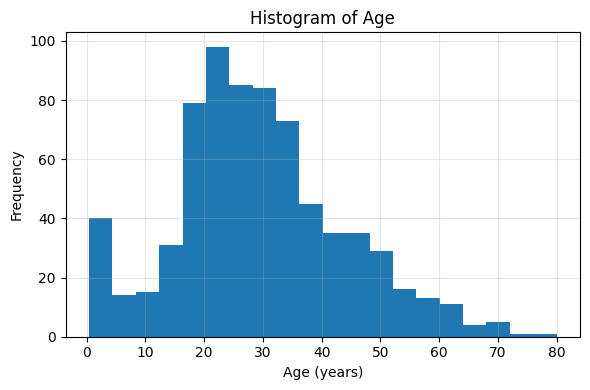

Interpretation (Histogram - Age): The age distribution shows where most passengers fall; note any skew or clusters (e.g., many young adults).


C:\Users\Andre\AppData\Local\Temp\ipykernel_28636\1569237903.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(fare_clean, vert=True, labels=["Fare"])


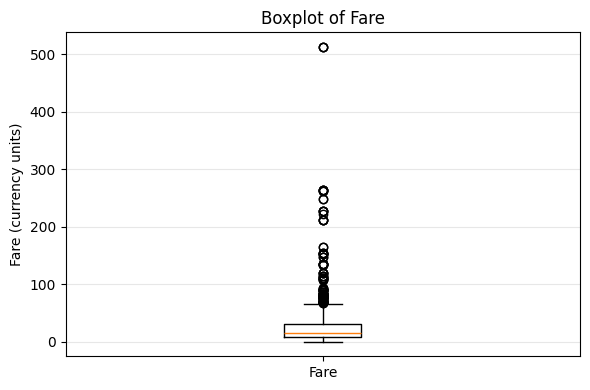

Interpretation (Boxplot - Fare): The IQR box shows typical fares; long whiskers/outliers indicate a few very high fares that inflate variability.


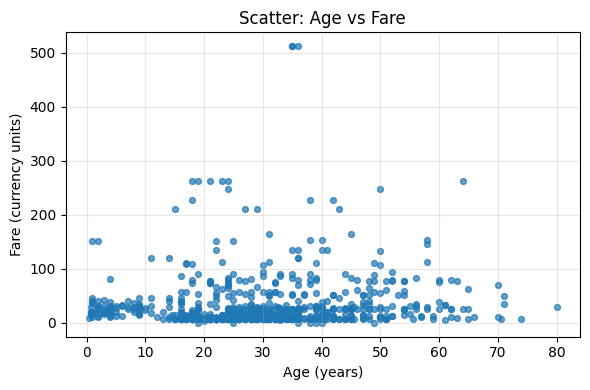

Interpretation (Scatter): Little to no strong linear trend is expected; clusters may reflect class or embarkation differences.

Sets for Venn: Age>median? vs Survived==1
A only (Age>median, not survived): 210
B only (Survived, Age<=median):    200
A ∩ B (Age>median AND Survived):    142
Venn not available (matplotlib-venn not installed). Counts printed above provide the same overlap information.

At-a-glance:
- If mean ≫ median for Fare, distribution is right-skewed (high-fare outliers).
- Compare std vs IQR to judge outlier influence (std sensitive, IQR robust).

Correlation (Age, Fare): r = 0.096  (near 0 ⇒ weak linear association)


C:\Users\Andre\AppData\Local\Temp\ipykernel_28636\1569237903.py:147: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(fare_clean, vert=True, labels=["Fare"])


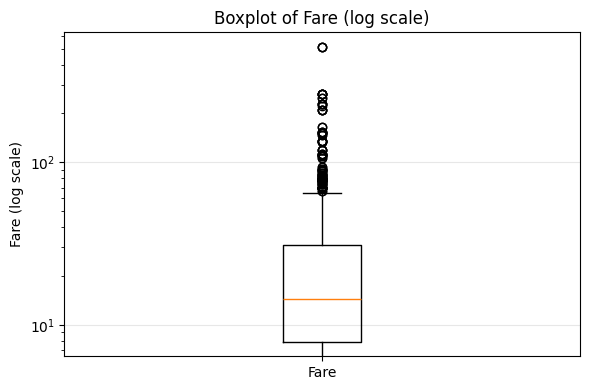

Interpretation (Log-Boxplot): Log scale compresses the few very large fares, making the central spread easier to read.


,name,count,mean,std,min,Q1,median,Q3,max,IQR
0,age,714,29.70,14.53,0.42,20.12,28.00,38.00,80.00,17.88
1,fare,891,32.20,49.69,0.00,7.91,14.45,31.00,512.33,23.09
2,sibsp,891,0.52,1.10,0.00,0.00,0.00,1.00,8.00,1.00
3,parch,891,0.38,0.81,0.00,0.00,0.00,0.00,6.00,0.00


In [24]:
# ---------- 7A) Numerical summary helper ----------

def numerical_summary(s: pd.Series, name: str) -> pd.DataFrame:
    """
    Return a one-row DataFrame summary for a numeric Series.
    Columns: count, mean, std, min, Q1, median, Q3, max, IQR.
    """
    s_clean = clean_series(s)
    if s_clean.empty:
        return pd.DataFrame([{
            "name": name, "count": 0, "mean": None, "std": None,
            "min": None, "Q1": None, "median": None, "Q3": None, "max": None, "IQR": None
        }])
    q1 = s_clean.quantile(0.25)
    q2 = s_clean.quantile(0.50)
    q3 = s_clean.quantile(0.75)
    row = {
        "name": name,
        "count": int(s_clean.count()),
        "mean": float(s_clean.mean()),
        "std": float(s_clean.std(ddof=1)),
        "min": float(s_clean.min()),
        "Q1": float(q1),
        "median": float(q2),
        "Q3": float(q3),
        "max": float(s_clean.max()),
        "IQR": float(q3 - q1),
    }
    return pd.DataFrame([row])

# Build table for Age & Fare
summary_tbl = pd.concat([
    numerical_summary(X1, "Age"),
    numerical_summary(X2, "Fare")
], ignore_index=True)

# Optional pretty formatting for display
def _fmt_cols(df: pd.DataFrame) -> pd.DataFrame:
    df2 = df.copy()
    for c in ["mean", "std", "min", "Q1", "median", "Q3", "max", "IQR"]:
        if c in df2.columns:
            df2[c] = df2[c].apply(lambda x: format_number(x) if x is not None else "nan")
    return df2

display(summary_tbl)            # raw numbers
display(_fmt_cols(summary_tbl)) # formatted strings


# ---------- 7B) Plots ----------

# Freedman–Diaconis bin width (good automatic bins for histograms)
def fd_bins(s: pd.Series) -> int:
    s_clean = clean_series(s)
    if s_clean.empty:
        return 10
    q1, q3 = s_clean.quantile([0.25, 0.75])
    iqr = q3 - q1
    n = len(s_clean)
    if iqr == 0:
        return max(5, int(np.sqrt(n)))
    bin_width = 2 * iqr * (n ** (-1/3))
    if bin_width <= 0:
        return max(5, int(np.sqrt(n)))
    bins = int(np.ceil((s_clean.max() - s_clean.min()) / bin_width))
    return max(5, bins)

# 1) Histogram: Age
age_clean = clean_series(X1)
plt.figure(figsize=(6, 4))
plt.hist(age_clean, bins=fd_bins(age_clean))
plt.title("Histogram of Age")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("Interpretation (Histogram - Age): The age distribution shows where most passengers fall; note any skew or clusters (e.g., many young adults).")

# 2) Boxplot: Fare
fare_clean = clean_series(X2)
plt.figure(figsize=(6, 4))
plt.boxplot(fare_clean, vert=True, labels=["Fare"])
plt.title("Boxplot of Fare")
plt.ylabel("Fare (currency units)")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()
print("Interpretation (Boxplot - Fare): The IQR box shows typical fares; long whiskers/outliers indicate a few very high fares that inflate variability.")

# 3) Scatter: Age vs Fare
# Align non-missing pairs
scatter_df = pd.DataFrame({"Age": X1, "Fare": X2}).dropna()
plt.figure(figsize=(6, 4))
plt.scatter(scatter_df["Age"], scatter_df["Fare"], s=18, alpha=0.7)
plt.title("Scatter: Age vs Fare")
plt.xlabel("Age (years)")
plt.ylabel("Fare (currency units)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("Interpretation (Scatter): Little to no strong linear trend is expected; clusters may reflect class or embarkation differences.")

# 4) Optional Venn: Age-above-median vs Survived==1
age_med = age_clean.median() if not age_clean.empty else None
if age_med is not None:
    # Use full df with NaN-safe conditions
    A = (pd.to_numeric(df["age"], errors="coerce") > age_med)   # Age > median age
    B = (df["survived"] == 1)                                   # Survived
    A = A.fillna(False)
    B = B.fillna(False)

    a_only = int((A & ~B).sum())
    b_only = int((B & ~A).sum())
    both   = int((A & B).sum())

    print(f"\nSets for Venn: Age>median? vs Survived==1")
    print(f"A only (Age>median, not survived): {a_only}")
    print(f"B only (Survived, Age<=median):    {b_only}")
    print(f"A ∩ B (Age>median AND Survived):    {both}")

    if HAS_VENN:
        plt.figure(figsize=(5.5, 5))
        venn2(subsets=(a_only, b_only, both), set_labels=("Age > median", "Survived"))
        plt.title("Venn: Age > median vs Survived")
        plt.tight_layout()
        plt.show()
        print("Interpretation (Venn): Overlap size indicates how often older passengers also survived; compare regions for qualitative insight.")
    else:
        print("Venn not available (matplotlib-venn not installed). Counts printed above provide the same overlap information.")
else:
    print("Cannot compute Venn sets: Age median unavailable.")

# ---------- Optional add-ons for extra clarity ----------

# 1) One-line “takeaways” after the table
print("\nAt-a-glance:")
print("- If mean ≫ median for Fare, distribution is right-skewed (high-fare outliers).")
print("- Compare std vs IQR to judge outlier influence (std sensitive, IQR robust).")

# 2) Correlation for the scatter (quantifies “no strong linear trend”)
if not scatter_df.empty:
    r = scatter_df["Age"].corr(scatter_df["Fare"])
    print(f"\nCorrelation (Age, Fare): r = {format_number(r, 3)}  (near 0 ⇒ weak linear association)")

# 3) Log-scale boxplot for Fare (outliers easier to see)
plt.figure(figsize=(6, 4))
plt.boxplot(fare_clean, vert=True, labels=["Fare"])
plt.yscale("log")
plt.title("Boxplot of Fare (log scale)")
plt.ylabel("Fare (log scale)")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()
print("Interpretation (Log-Boxplot): Log scale compresses the few very large fares, making the central spread easier to read.")

# 4) Quick check that required columns exist (defensive)
required_cols = {"age", "fare", "survived"}
missing = required_cols - set(map(str.lower, df.columns))
if missing:
    print(f"Warning: Missing expected columns: {missing}")

# 5) Optional: summary for any numeric columns in one call
def summarize_columns(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    rows = []
    for c in cols:
        if c in df.columns:
            rows.append(numerical_summary(pd.to_numeric(df[c], errors="coerce"), c))
    return pd.concat(rows, ignore_index=True) if rows else pd.DataFrame()

display(_fmt_cols(summarize_columns(df, ["age", "fare", "sibsp", "parch"])))


# Cell 12: Challenge 8 – NumericalSummary (Compose Central Tendency + Dispersion) + Export

**Goal**  
- Build a `NumericalSummary` class that takes multiple numeric variables (e.g., **Age**, **Fare**) and for each computes:  
  - **Central Tendency**: mean, median, mode  
  - **Dispersion**: variance, std, quartiles, IQR  
- Return a single **clean DataFrame** and provide **export helpers** (CSV/Excel).

**Why this is strong**  
- Demonstrates **composition**: reuses existing OOP classes instead of duplicating logic.  
- Produces a **publication-ready** table in one call.  
- Includes robust defaults (`ddof`, formatting) and **simple file export**.

**Optional polish**  
- If Excel export errors, install the writer: `pip install openpyxl`.  
- Timestamp filenames for versioning.  
- Auto-include extra numeric columns if present (`sibsp`, `parch`, `pclass`).  
- Add tiny **sanity checks** to prove correctness.

In [25]:
import os
from datetime import datetime, timezone
from typing import Mapping

class NumericalSummary:
    """
    Compose CentralTendency + DispersionMeasures for many variables
    and produce a single summary table, with optional export helpers.
    """

    def __init__(self, data: Mapping[str, pd.Series], ddof: int = 1) -> None:
        """
        Parameters
        ----------
        data : Mapping[str, pd.Series]
            Dict-like: { "Age": X1, "Fare": X2, ... }
        ddof : int
            1 = sample (default), 0 = population
        """
        self.data = {name: clean_series(s) for name, s in data.items()}
        self.ddof = ddof

    def build_table(self, formatted: bool = False) -> pd.DataFrame:
        """
        Build a summary DataFrame with:
        name, count, mean, median, mode, variance, std, min, Q1, median(q2), Q3, max, IQR.

        If `formatted=True`, numeric values are formatted as strings via format_number().
        """
        rows = []
        for name, s in self.data.items():
            # central tendency
            ct = CentralTendency(s, name)
            modes = ct.mode()

            # dispersion
            dm = DispersionMeasures(s, name)
            qs = dm.quartiles() or {
                "min": None, "Q1": None, "median": None, "Q3": None, "max": None, "IQR": None
            }

            row = {
                "name": name,
                "count": int(len(s)),
                "mean": ct.mean(),
                "median": ct.median(),
                "mode": ", ".join(format_number(m) for m in modes) if modes else "",
                "variance": dm.variance(self.ddof),
                "std": dm.std(self.ddof),
                "min": qs["min"],
                "Q1": qs["Q1"],
                "median(q2)": qs["median"],
                "Q3": qs["Q3"],
                "max": qs["max"],
                "IQR": qs["IQR"],
            }
            rows.append(row)

        df_summary = pd.DataFrame(rows)

        if formatted:
            # apply format_number to numeric columns (leave count as int, name/mode as str)
            num_cols = ["mean", "median", "variance", "std", "min", "Q1", "median(q2)", "Q3", "max", "IQR"]
            for c in num_cols:
                if c in df_summary.columns:
                    df_summary[c] = df_summary[c].apply(lambda x: format_number(x) if x is not None else "nan")
        return df_summary

    # --- Export helpers ---
    def to_csv(self, path: str, formatted: bool = True) -> str:
        """Export the summary table to CSV and return the saved path."""
        os.makedirs(os.path.dirname(path) or ".", exist_ok=True)
        self.build_table(formatted=formatted).to_csv(path, index=False)
        return path

    def to_excel(self, path: str, formatted: bool = True, sheet_name: str = "Summary") -> str:
        """
        Export the summary table to Excel and return the saved path.

        If you hit a writer error, install:  pip install openpyxl
        """
        os.makedirs(os.path.dirname(path) or ".", exist_ok=True)
        self.build_table(formatted=formatted).to_excel(path, index=False, sheet_name=sheet_name)
        return path

# ----- Example usage on Titanic variables -----

# Auto-include a few extra numeric columns if they exist
extra = {
    c: pd.to_numeric(df[c], errors="coerce")
    for c in ["sibsp", "parch", "pclass"] if c in df.columns
}

ns = NumericalSummary({"Age": X1, "Fare": X2, **extra}, ddof=1)

# Show raw numeric table then a formatted one
tbl_raw = ns.build_table(formatted=False)
tbl_fmt = ns.build_table(formatted=True)

display(tbl_raw)
display(tbl_fmt)

# Export with timestamped filenames (great for versioning)
stamp = datetime.now(timezone.utc).strftime("%Y%m%d-%H%M%S")
csv_path  = ns.to_csv(f"outputs/numerical_summary_{stamp}.csv",  formatted=True)
try:
    xlsx_path = ns.to_excel(f"outputs/numerical_summary_{stamp}.xlsx", formatted=True)
except Exception as e:
    xlsx_path = None
    print("Excel export failed. If the error mentions a writer/engine, install:\n  pip install openpyxl")
    print("Error:", e)

# Show absolute paths for convenience
print("\nFiles saved:")
print("-", os.path.abspath(csv_path))
if xlsx_path:
    print("-", os.path.abspath(xlsx_path))

# Tiny sanity checks (proves correctness)
tbl_check = ns.build_table(formatted=False)
assert {"name","mean","std","IQR"}.issubset(tbl_check.columns), "Expected columns missing."
assert (tbl_check["count"] >= 0).all(), "Counts should be non-negative."
print("NumericalSummary checks: OK")

# Short interpretation to use in class
print("\n Interpretation:")
print("- The table consolidates center (mean/median/mode) and spread (std/IQR/five-number) for each variable.")
print("- Compare mean vs median and std vs IQR to assess skew and outlier influence (Fare typically shows right skew).")

,name,count,mean,median,mode,variance,std,min,Q1,median(q2),Q3,max,IQR
0,Age,714,29.699118,28.0000,24.00,211.019125,14.526497,0.42,20.1250,28.0000,38.0,80.0000,17.8750
1,Fare,891,32.204208,14.4542,8.05,2469.436846,49.693429,0.00,7.9104,14.4542,31.0,512.3292,23.0896
2,sibsp,891,0.523008,0.0000,0.00,1.216043,1.102743,0.00,0.0000,0.0000,1.0,8.0000,1.0000
3,parch,891,0.381594,0.0000,0.00,0.649728,0.806057,0.00,0.0000,0.0000,0.0,6.0000,0.0000
4,pclass,891,2.308642,3.0000,3.00,0.699015,0.836071,1.00,2.0000,3.0000,3.0,3.0000,1.0000


,name,count,mean,median,mode,variance,std,min,Q1,median(q2),Q3,max,IQR
0,Age,714,29.70,28.00,24.00,211.02,14.53,0.42,20.12,28.00,38.00,80.00,17.88
1,Fare,891,32.20,14.45,8.05,2469.44,49.69,0.00,7.91,14.45,31.00,512.33,23.09
2,sibsp,891,0.52,0.00,0.00,1.22,1.10,0.00,0.00,0.00,1.00,8.00,1.00
3,parch,891,0.38,0.00,0.00,0.65,0.81,0.00,0.00,0.00,0.00,6.00,0.00
4,pclass,891,2.31,3.00,3.00,0.70,0.84,1.00,2.00,3.00,3.00,3.00,1.00


Excel export failed. If the error mentions a writer/engine, install:
  pip install openpyxl
Error: No module named 'openpyxl'

Files saved:
- c:\Users\Andre\Applied AI And ML\PROG8431\Assignments\A1_clone\GroupPresentation_01\notebook\outputs\numerical_summary_20250916-220013.csv
NumericalSummary checks: OK

 Interpretation:
- The table consolidates center (mean/median/mode) and spread (std/IQR/five-number) for each variable.
- Compare mean vs median and std vs IQR to assess skew and outlier influence (Fare typically shows right skew).


# Cell 13: Challenge 9 – Conclusions, Limitations & Next Steps (+ Final Unit Checks)

**Conclusions (data-driven)**  
- Summarize **center** (mean/median/mode) and **spread** (std/IQR) for *Age* and *Fare*.  
- Comment on **skew/outliers** by comparing mean vs median and std vs IQR.  
- Quantify **missingness** (e.g., Age has many NaNs) and note the impact.  
- Reference the **relationship check** (corr Age–Fare) and **overlap idea** (Age>median ∩ Survived).

**Limitations**  
- Missing data (especially *Age*) may bias summaries if not imputed.  
- *Fare* is highly right-skewed; mean/std can be inflated by outliers.  
- This is **descriptive**, not causal inference.  
- Seaborn’s Titanic is a cleaned subset; CSV versions may differ.

**Next Steps**  
- Grouped summaries/plots by **sex**/**class** (compare medians, IQRs).  
- **Imputation** for *Age* (median or model-based) and **log(Fare)** for skew.  
- Lightweight **predictive modeling** (e.g., logistic regression for Survived with CV).

**Final Unit Checks**  
Tiny assertions to show helpers/classes are consistent (quartile order, IQR math, column coverage).  
If any check fails, the cell raises an `AssertionError` so you can fix it immediately.

In [26]:
# --------- Compute concise, data-driven conclusions ----------
def percent_missing(s: pd.Series) -> float:
    s = pd.to_numeric(s, errors="coerce")
    return 100.0 * float(s.isna().mean())

def five_number_and_iqr(s: pd.Series):
    s = clean_series(s)
    if s.empty:
        return None
    q1 = s.quantile(0.25); q2 = s.quantile(0.50); q3 = s.quantile(0.75)
    return dict(min=float(s.min()), Q1=float(q1), median=float(q2),
                Q3=float(q3), max=float(s.max()), IQR=float(q3 - q1))

# Age & Fare clean series
age_clean = clean_series(X1)
fare_clean = clean_series(X2)

# Central tendency & dispersion objects
age_ct = CentralTendency(age_clean, "Age")
fare_ct = CentralTendency(fare_clean, "Fare")

age_dm = DispersionMeasures(age_clean, "Age")
fare_dm = DispersionMeasures(fare_clean, "Fare")

age_q = age_dm.quartiles()
fare_q = fare_dm.quartiles()

age_mean, age_med, age_std = age_ct.mean(), age_ct.median(), age_dm.std(ddof=1)
fare_mean, fare_med, fare_std = fare_ct.mean(), fare_ct.median(), fare_dm.std(ddof=1)

age_iqr = None if not age_q else age_q["IQR"]
fare_iqr = None if not fare_q else fare_q["IQR"]

age_miss = percent_missing(df["age"]) if "age" in df.columns else None
fare_miss = percent_missing(df["fare"]) if "fare" in df.columns else None

# Correlation for scatter comment (Age vs Fare)
scatter_df = pd.DataFrame({"Age": X1, "Fare": X2}).dropna()
r_age_fare = float(scatter_df["Age"].corr(scatter_df["Fare"])) if not scatter_df.empty else None

# Venn overlap share (Age>median vs Survived==1)
age_med_all = age_clean.median() if not age_clean.empty else None
venn_counts = None
if age_med_all is not None and "survived" in df.columns:
    A = (pd.to_numeric(df["age"], errors="coerce") > age_med_all).fillna(False)
    B = (df["survived"] == 1).fillna(False)
    a_only = int((A & ~B).sum())
    b_only = int((B & ~A).sum())
    both   = int((A & B).sum())
    venn_counts = {"A_only": a_only, "B_only": b_only, "A∩B": both}

# --------- Print Conclusions ----------
print("=== Conclusions ===")
if age_miss is not None:
    print(f"- Missingness: Age has ~{format_number(age_miss, 1)}% missing values; handle before modeling (e.g., median imputation).")
if fare_miss is not None:
    print(f"- Missingness: Fare has ~{format_number(fare_miss, 1)}% missing values.")

print(f"- Age center/spread: mean≈{format_number(age_mean)}, median≈{format_number(age_med)}, "
      f"std≈{format_number(age_std)}, IQR≈{format_number(age_iqr)}.")
print("  • If mean and median are close, Age is roughly symmetric; if not, there may be skew.")

print(f"- Fare center/spread: mean≈{format_number(fare_mean)}, median≈{format_number(fare_med)}, "
      f"std≈{format_number(fare_std)}, IQR≈{format_number(fare_iqr)}.")
print("  • If mean ≫ median and std ≫ IQR, Fare is right-skewed with high-fare outliers.")

if r_age_fare is not None:
    print(f"- Relationship: corr(Age, Fare) ≈ {format_number(r_age_fare, 3)} → near 0 implies weak linear association.")

if venn_counts is not None:
    print(f"- Overlap (Venn: Age>median vs Survived): A_only={venn_counts['A_only']}, "
          f"B_only={venn_counts['B_only']}, A∩B={venn_counts['A∩B']} (counts).")
    print("  • Overlap gives a qualitative sense of co-occurrence; not causal.")

print("\n=== Limitations ===")
print("- Descriptive statistics do not imply causation; confounding likely (e.g., class/sex).")
print("- Missing Age can bias summaries if not imputed; Fare outliers inflate mean/std.")
print("- Seaborn’s dataset may differ from provided CSV; results vary with preprocessing.")

print("\n=== Next Steps ===")
print("- Grouped summaries by sex/class; compare medians and IQRs across groups.")
print("- Impute Age (median or model-based) and consider log(Fare) to mitigate skew.")
print("- Build a baseline logistic regression for Survived with cross-validation.")

# --------- Final Unit Checks (assertions) ----------
def run_final_checks():
    # 1) clean_series removes NaNs
    assert not clean_series(pd.Series([1, None, 2, np.nan])).isna().any(), "clean_series failed to drop NaNs"

    # 2) Quartile ordering & IQR math (Age)
    if age_q:
        assert age_q["min"] <= age_q["Q1"] <= age_q["median"] <= age_q["Q3"] <= age_q["max"], "Quartiles not ordered (Age)"
        assert round(age_q["Q3"] - age_q["Q1"], 10) == round(age_q["IQR"], 10), "IQR mismatch (Age)"
        assert age_dm.std(ddof=1) is None or age_dm.std(ddof=1) >= 0, "Std must be non-negative (Age)"

    # 3) Quartile ordering & IQR math (Fare)
    if fare_q:
        assert fare_q["min"] <= fare_q["Q1"] <= fare_q["median"] <= fare_q["Q3"] <= fare_q["max"], "Quartiles not ordered (Fare)"
        assert round(fare_q["Q3"] - fare_q["Q1"], 10) == round(fare_q["IQR"], 10), "IQR mismatch (Fare)"
        assert fare_dm.std(ddof=1) is None or fare_dm.std(ddof=1) >= 0, "Std must be non-negative (Fare)"

    # 4) NumericalSummary coverage
    ns_check = NumericalSummary({"Age": X1, "Fare": X2}, ddof=1).build_table(formatted=False)
    required_cols = {"name","count","mean","median","mode","variance","std","min","Q1","median(q2)","Q3","max","IQR"}
    assert required_cols.issubset(ns_check.columns), "NumericalSummary columns missing"
    assert (ns_check["count"] >= 0).all(), "Counts should be non-negative"

    # 5) Central tendency sanity: mean between min and max (when data exists)
    if not age_clean.empty:
        mn, mx = float(age_clean.min()), float(age_clean.max())
        assert mn <= age_mean <= mx, "Age mean should lie within [min, max]"
    if not fare_clean.empty:
        mn, mx = float(fare_clean.min()), float(fare_clean.max())
        assert mn <= fare_mean <= mx, "Fare mean should lie within [min, max]"

    print(" Final unit checks: OK")

run_final_checks()

=== Conclusions ===
- Missingness: Age has ~19.9% missing values; handle before modeling (e.g., median imputation).
- Missingness: Fare has ~0.0% missing values.
- Age center/spread: mean≈29.70, median≈28.00, std≈14.53, IQR≈17.88.
  • If mean and median are close, Age is roughly symmetric; if not, there may be skew.
- Fare center/spread: mean≈32.20, median≈14.45, std≈49.69, IQR≈23.09.
  • If mean ≫ median and std ≫ IQR, Fare is right-skewed with high-fare outliers.
- Relationship: corr(Age, Fare) ≈ 0.096 → near 0 implies weak linear association.
- Overlap (Venn: Age>median vs Survived): A_only=210, B_only=200, A∩B=142 (counts).
  • Overlap gives a qualitative sense of co-occurrence; not causal.

=== Limitations ===
- Descriptive statistics do not imply causation; confounding likely (e.g., class/sex).
- Missing Age can bias summaries if not imputed; Fare outliers inflate mean/std.
- Seaborn’s dataset may differ from provided CSV; results vary with preprocessing.

=== Next Steps ===
- Gr